<a href="https://colab.research.google.com/github/MLSBHARGAVASAI/Urban-Flood-Risk-Data-Global-City-Analysis-2025/blob/main/Climate_Risk_%26_Disaster_Management(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌊 Urban Flood Risk Analysis – Global Cities 2025.  

**Dataset:** Urban Flood Risk Data: Global City Analysis 2025  






## 📌**Problem Statement**

Urban flooding is an escalating threat worldwide due to climate change, rapid urbanization, and inadequate drainage infrastructure. Understanding which areas are most vulnerable is critical for effective disaster management and climate resilience.  

This analysis focuses on **urban flood risk segments** across global cities to identify high-risk areas and uncover patterns using:  

- Segment elevation and topography  
- Land-use types and soil infiltration  
- Storm drainage infrastructure  
- Historical rainfall intensity and return periods  
- Multi-label risk indicators (e.g., ponding hotspots, low-lying areas, sparse drainage)  

The insights from this study will help **urban planners and policymakers** prioritize mitigation strategies, improve infrastructure, and reduce flood-related hazards.


**Week 1 – Climate Risk & Disaster Management**

**Import Libraries**

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


**Load Dataset**

In [11]:
# Load dataset
df = pd.read_csv('/content/urban_pluvial_flood_risk_dataset.csv')

# Display first rows
df.head()


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


**Dataset Overview**

In [12]:
print("🔹 Dataset Shape:", df.shape)
print("🔹 Total Rows   :", df.shape[0])
print("🔹 Total Columns:", df.shape[1])
print("🔹 Number of Unique Cities:", df['city_name'].nunique())
print("🔹 Example Cities:", df['city_name'].unique()[:5], "\n")

# Dataset Info
print("📌 Dataset Info:")
df.info()

# Summary Statistics (numeric columns only)
print("\n📌 Summary Statistics:")
display(df.describe().style.background_gradient(cmap="Blues").format("{:.2f}"))

# Missing Values
print("\n📌 Missing Values Check:")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
display(missing_df[missing_df['Missing Values'] > 0].style.background_gradient(cmap="Reds"))


🔹 Dataset Shape: (2963, 17)
🔹 Total Rows   : 2963
🔹 Total Columns: 17
🔹 Number of Unique Cities: 63
🔹 Example Cities: ['Colombo, Sri Lanka' 'Chennai, India' 'Ahmedabad, India'
 'Hong Kong, China' 'Durban, South Africa'] 

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   obj

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.00,2963.00,2802.00,2679.00,2724.00,2963.00,2963.00
mean,19.40,31.68,37.69,6.29,123.20,43.81,19.73
std,24.45,79.54,38.71,2.19,107.76,25.22,25.18
min,-37.00,-123.29,-3.00,1.27,0.20,5.40,2.00
25%,6.58,-43.12,8.73,4.67,47.98,25.80,5.00
50%,23.76,36.89,25.13,6.25,91.70,37.90,10.00
75%,37.89,101.70,59.62,7.83,162.62,55.55,25.00
max,55.82,174.91,266.70,12.07,751.70,150.00,100.00



📌 Missing Values Check:


,Missing Values,Percentage (%)
soil_group,362,12.217347
rainfall_source,315,10.631117
drainage_density_km_per_km2,284,9.584880
storm_drain_proximity_m,239,8.066149
storm_drain_type,178,6.007425
elevation_m,161,5.433682


**Exploratory Data Analysis (EDA)**

In [13]:
# Top 10 cities with most segments
city_counts = df['city_name'].value_counts().head(10)
fig = px.bar(city_counts, x=city_counts.index, y=city_counts.values,
             color=city_counts.values, title='Top 10 Cities with Most Segments')
fig.show()

# Elevation distribution
fig = px.histogram(df, x='elevation_m', nbins=50, title='Elevation Distribution')
fig.show()

# Land use distribution
landuse_counts = df['land_use'].value_counts()
fig = px.pie(values=landuse_counts.values, names=landuse_counts.index,
             title='Land Use Distribution')
fig.show()

# Risk labels frequency
risk_labels = df['risk_labels'].dropna().str.split('|').explode().value_counts()
fig = px.bar(risk_labels, x=risk_labels.index, y=risk_labels.values,
             color=risk_labels.values, title='Frequency of Risk Labels')
fig.show()


**Correlation Analysis**

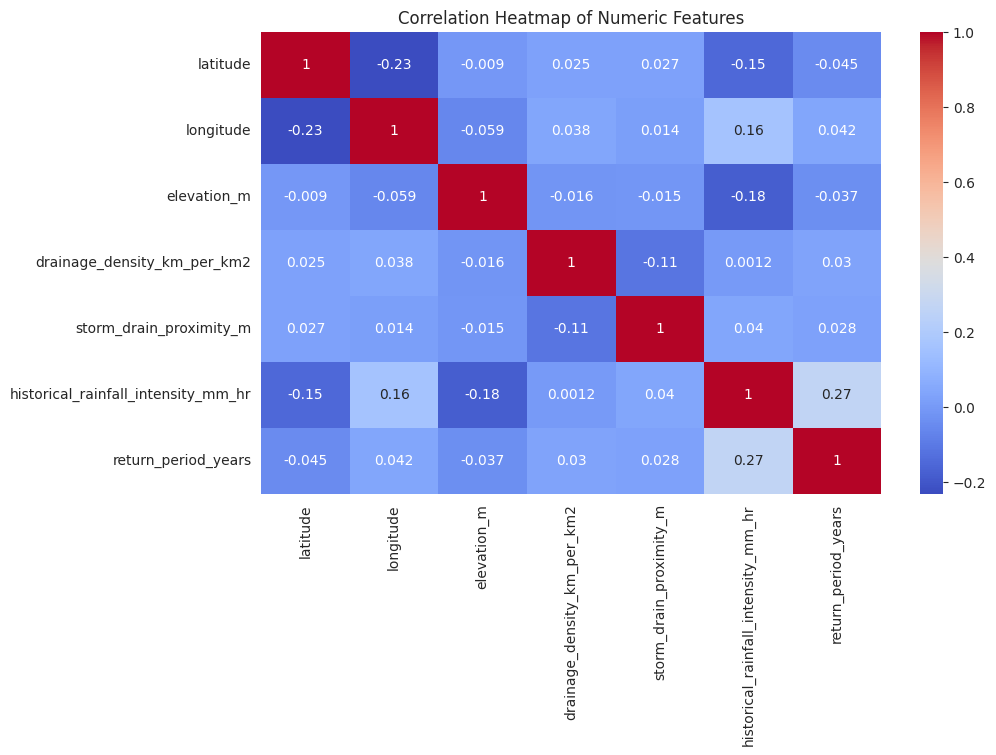

In [14]:
# Numeric columns correlation
numeric_cols = ['latitude','longitude','elevation_m','drainage_density_km_per_km2','storm_drain_proximity_m','historical_rainfall_intensity_mm_hr','return_period_years']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
